# Saudi Used Cars

by: Aditya Hadiyan Pudyo

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

[Sumber data Data Saudi Used Cars](https://drive.google.com/file/d/1Tr4YT5dmgwTrXLvIqZ4diBf5z8K6JjrR/view) 

## Business Problem Understanding

**Context**

Suatu perusahaan platform jual beli kendaraan bekas berperan sebagai pihak ketiga dalam mempertemukan antara penjual dan pembeli. Sejauh ini perusahaan memberikan kebebasan kepada para penjual untuk menentukan harga jual mereka masing masing, dimana hal ini memberikan kesulitan kepada penjual untuk mengetahui harga pasar untuk kendaraan yang akan mereka jual. Terdapat banyak faktor yang mempengaruhi harga jual suatu kendaraan. Apabila harga kendaraan dibawah harga pasar tentu akan merugukan penjual dan apabila terlalu mahal maka tidak ada pembeli yang akan membeli mobil tersebut. Hal tersebut juga harus dipahami oleh penjual, karena dapat mempengaruhi durasi penjualan kendaraan mereka, karena apabila kendaraan memiliki harga diatas rata-rata dengan klasifikasi yang sama akan lebih lambat terjual.

**Problem Statement**<br>

Penentuan harga dan strategi dalam melakukan penjualan menjadi suatu masalah tersendiri dalam penjualan mobil bekas. perusahaan ingin membantu user mereka untuk menentukan strategi penjualan dan harga yang tepat dalam penjualan mobil di aplikasi yang mereka miliki. Hal tersebut diharapkan dapat membuat **user dari aplikasi yang mereka miliki meningkat**, dengan meningkatnya user maka di harapkan **trafik di dalam aplikasi yang mereka miliki meningkat**.

**Goals**

Berdasarkan permasalahan tersebut perusahaan dirasa perlu memiliki suatu perangkat untuk memprediksi dan membantu user mereka (penjual) untuk dapat menentukan harga jual mobil yang tepat untuk setiap pengguna aplikasi mereka. Adanya perbedaan pada berbagai fitur yang terdapat pada mobil bekas seperti jenis transmisi, tahun produksi, dan jarak tempuh dapat menambah kekakuratan dalam mempredikis harga jual suatu mobil bekas.<br><br>
Bagi perusahaan memberikan estimasi harga yang tepat dapat membantu penjual dalam menentukan harga jual mobil mereka, dengan begitu penjual mendapatkan harga yang bagus dan menguntungkan serta pembeli juga tida dirugikan karena harga yang terlalu tinggi. Dengan sistem penilaian harga yang baik diharapkan trafic didalam platform jual beli milik perusahaan akan meningkat, sehingga akan meningkatkan *revenue* bagi perusahaan.

**Analytics Approach**

Perlu dilakukannya analisa data untuk menentukan pola dari fitur fitur yang ada dan membedakan suatu tipe dengan tipe yang lain. Selanjutnya akan dibangun model regresi yang membantu perusahaan untuk dapat menyediakan *prediction tools* untuk menaksir harga mobil yang akan dijual pada aplikasi milik mereka.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## Data Understanding

Setiap baris pada data merepresentasikan informasi terkait mobil, baik tipe, asal kota dan kondisi kendaraan

|No.| **Atribut** |  | **Deskripsi** |
|--| --- | --- | --- |
|1| Type | : | Tipe |
|2| Region | : | Region |
|3| Make | : | Merek |
|4| Gear_Type | : | Sistem Transmisi |
|5| Origin | : | Asal Negara |
|6| Options | : | Options |
|7| Year | : | Tahun Pembuatan |
|8| Engine_Size | : | Ukuran Silinder Mesin |
|9| Mileage | : | Jarak Tempuh |
|10| Negotiable | : | Dapat di Negosiasi atau tidak |
|11| price | : | Harga |

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Load Dataset

In [130]:
df = pd.read_csv('D:\Belajar_Purwadika\capstone_modul3\data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [131]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2).values])
show = pd.DataFrame(dfDesc, columns=['Nama Kolom', 'Tipe Data', 'Jumlah Null', 'Jumlah Unique Value','Contoh Unique Value'])
show

,Nama Kolom,Tipe Data,Jumlah Null,Jumlah Unique Value,Contoh Unique Value
0,Type,object,0,347,"[F-Pace, GC7]"
1,Region,object,0,27,"[Al-Baha, Hail]"
2,Make,object,0,58,"[Fiat, Suzuki]"
3,Gear_Type,object,0,2,"[Automatic, Manual]"
4,Origin,object,0,4,"[Other, Saudi]"
5,Options,object,0,3,"[Full, Standard]"
6,Year,int64,0,50,"[1987, 1977]"
7,Engine_Size,float64,0,71,"[6.9, 6.0]"
8,Mileage,int64,0,1716,"[169, 118]"
9,Negotiable,bool,0,2,"[True, False]"


Data yang dimiliki bersih tidak ada nilai null

### Exploratory Data Analysis

#### Deskripsi statistik

In [132]:
display(df.describe(), df.describe(include='object'))

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


Text(0.5, 1.0, 'Correlation Matrix')

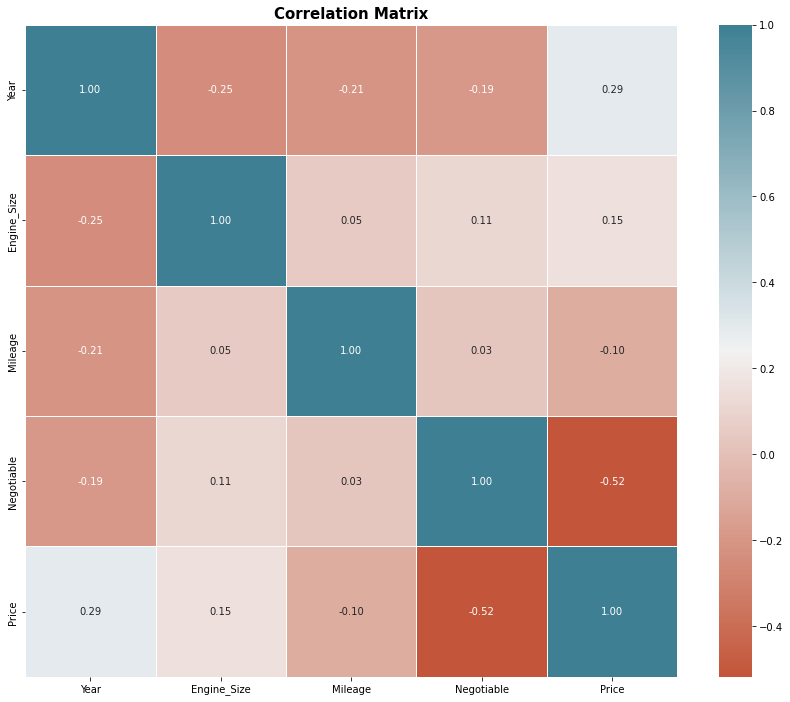

In [133]:
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur price.

In [134]:
df.groupby('Negotiable').median()['Price']

Negotiable
False    58000.0
True         0.0
Name: Price, dtype: float64

In [135]:
df[(df['Negotiable'] == 'True') & (df['Price'] != 0)]['Type'].count()

0

<AxesSubplot:xlabel='Negotiable', ylabel='Price'>

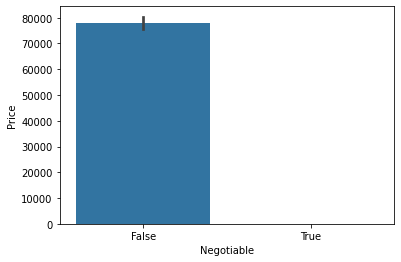

In [136]:
sns.barplot(df["Negotiable"], df['Price'])

Dapat disimpulkan bahwa seluruh fariabel dengan *negotiation = True* memiliki harga 0

### Data Cleaning dan Feature Engineering

Selanjutnya dilakukan feature enginering dan data  cleaning dengan tujuan untuk membuat data data yang ada didalam model dapat digunakan untuk pemodelan. dimana data yang tidak masuk akal akan dihilangkan dan tidak di ikut sertakan dalam pemodelan

In [137]:
df2 = df[df["Negotiable"] == False]
df2.drop(columns=['Negotiable'], inplace= True)
df2.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [138]:
df2["Price"].min()


0

In [139]:
df2 = df2[df2.Price != 0]
df2["Price"].min()


1

In [140]:
df2 = df2[df2.Price != 1]
df2["Price"].min()

500

Selanjutnya dilakukan droping variable dengan Negotiable True, dikarenakan selurun data dengan nilai negotiable true akan memiliki harga 0. Dilanjutkan dengan melihat data terkecil untuk model dan di dapatkan terdapat 2 data yang tidak masuk akal, dimana harga keduanya adalah 0 dan 1, sehingga kedua data tersebut tidak di ikutsertakan dalam pemodelan.

#### Uji distribusi data

**Dengan negotiable True**

Text(0.5, 1.0, 'Price Distribution Plot (with negotiable true)')

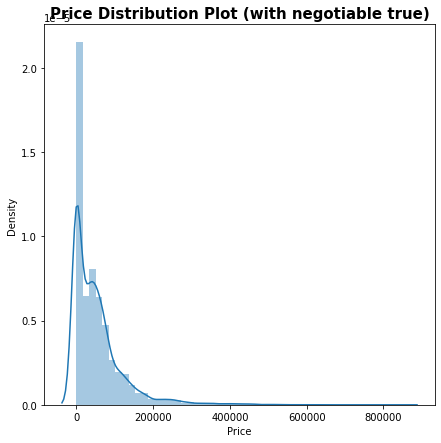

In [141]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot (with negotiable true)', size=15, weight='bold')

In [142]:
from scipy.stats import shapiro

sw_Statistic, sw_pvalue = shapiro(df["Price"])

if sw_pvalue > 0.05:
    print (f'Data terdistribusi Normal, pvalue = {sw_pvalue}')
else:
    print(f'Data tidak terdistribusi normal, pvalue = {sw_pvalue}')

Data tidak terdistribusi normal, pvalue = 0.0


**Tanpa Negotiable True**

Text(0.5, 1.0, 'Price Distribution Plot (whitout negotiable true)')

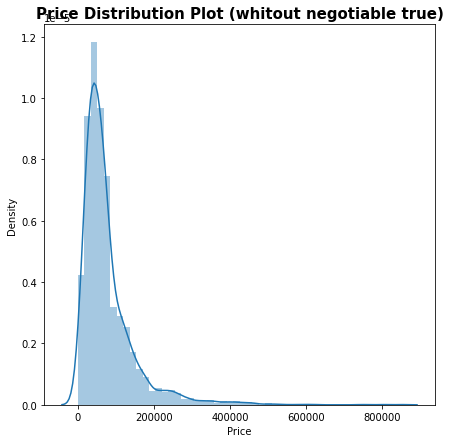

In [143]:
plt.figure(figsize=(7, 7))
sns.distplot(df2['Price'])
plt.title('Price Distribution Plot (whitout negotiable true)', size=15, weight='bold')

In [144]:
from scipy.stats import shapiro

sw_Statistic, sw_pvalue = shapiro(df2['Price'])

if sw_pvalue > 0.05:
    print (f'Data terdistribusi Normal, pvalue = {sw_pvalue}')
else:
    print(f'Data tidak terdistribusi normal, pvalue = {sw_pvalue}')

Data tidak terdistribusi normal, pvalue = 0.0


Dari 2 gambar dan 2 uji statistika diatas (dengan dan tanpa Negotiation True) dapat disimpulkan bahwa distribusi data harga jual mobil bekas tidak terdistribusi normal. Pada grafik terlihat bahwa terdapat *right-skewed dsitribution*, dengan kata lain terdapat *positive skewness* pada fitur price

#### Plot description

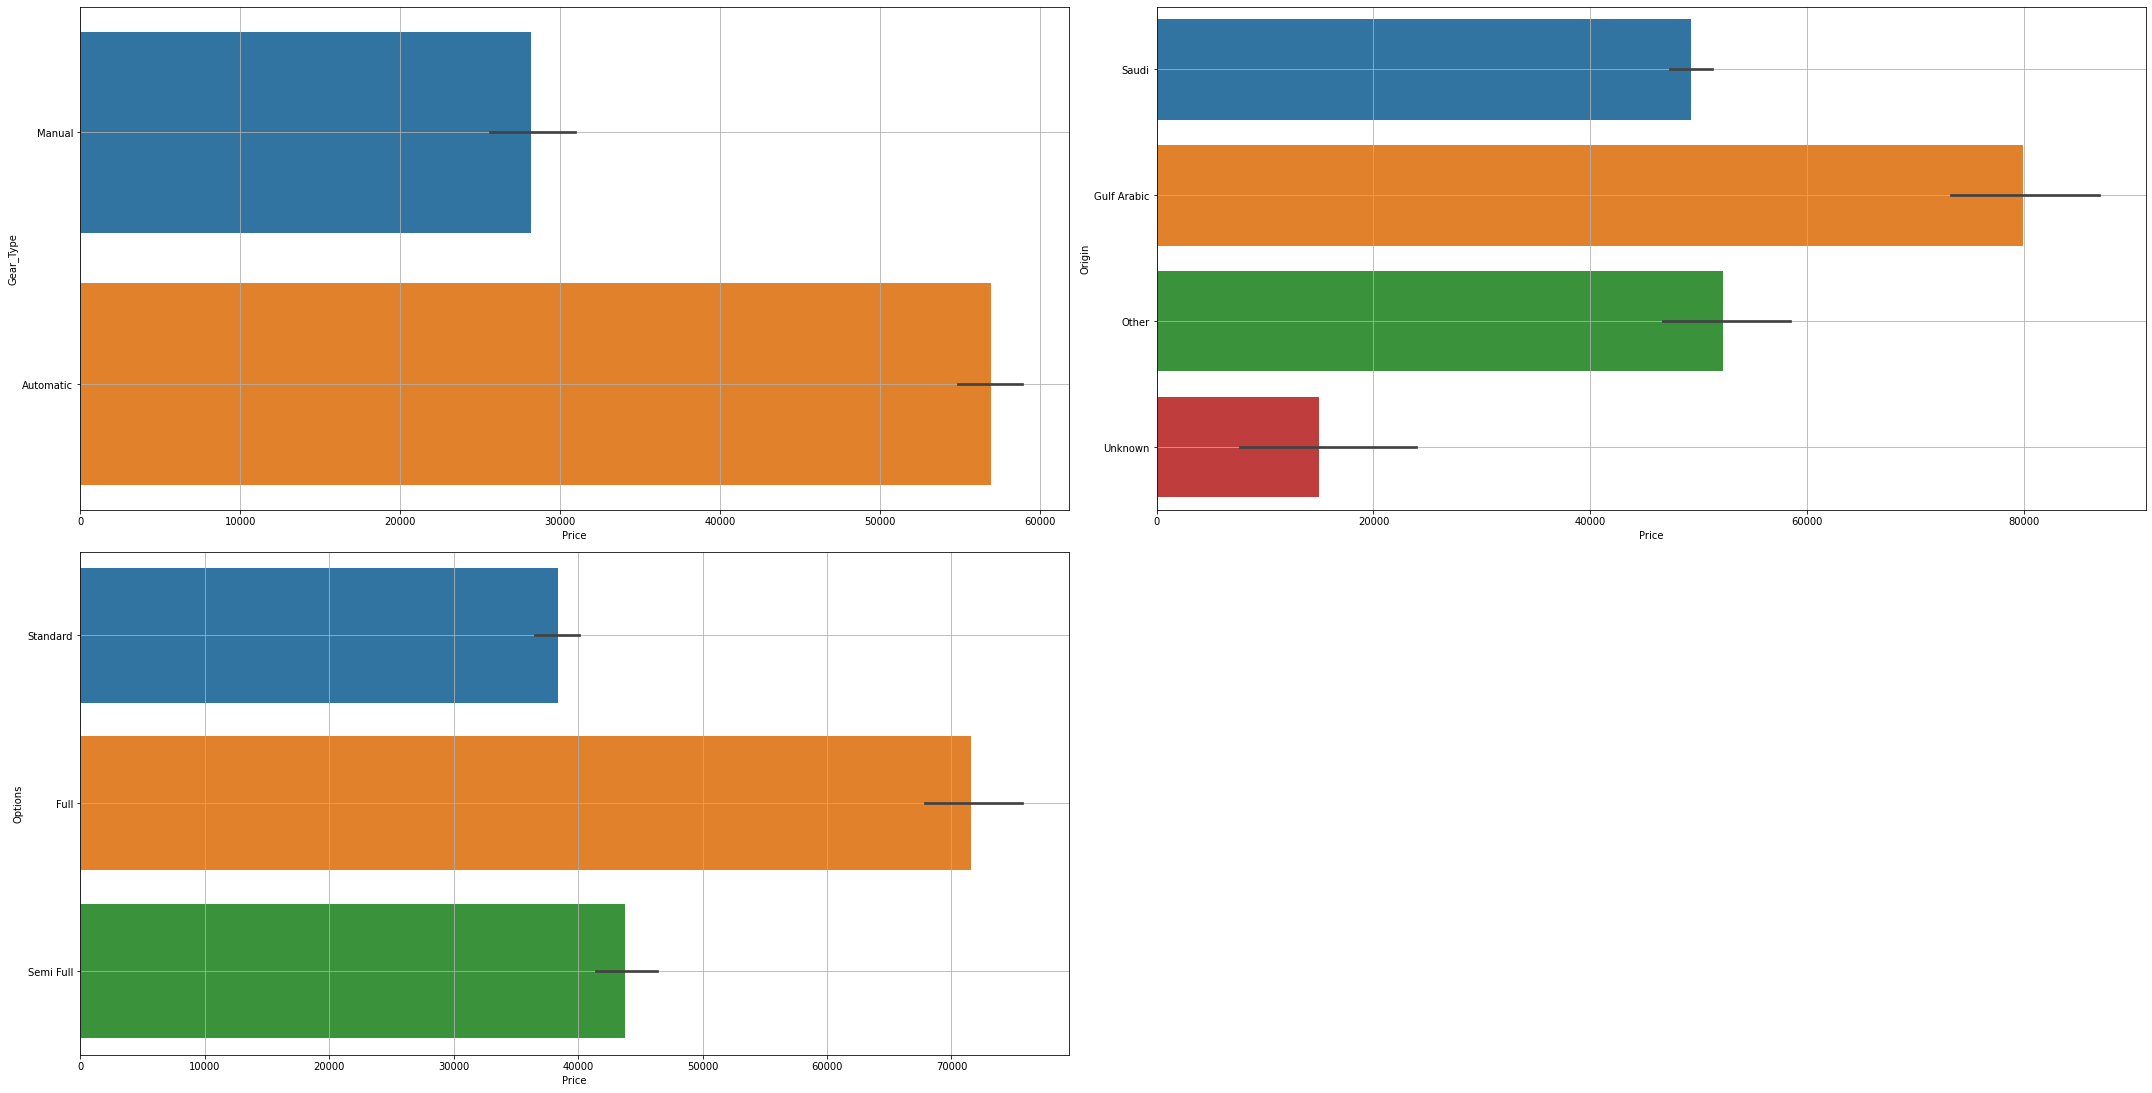

In [145]:
count = 0
fig = plt.figure(figsize=(30,30))

for i in df2[['Gear_Type','Origin', 'Options']].columns:
    count +=1
    ax= plt.subplot(4,2,count)
    sns.barplot(df["Price"], df[i])
    fig.tight_layout()
    plt.grid(True)

plt.show()


,Type
Region,
Abha,30
Al-Ahsa,111
Al-Baha,18
Al-Jouf,15
Al-Medina,124
Al-Namas,10
Arar,7
Aseer,87
Besha,3


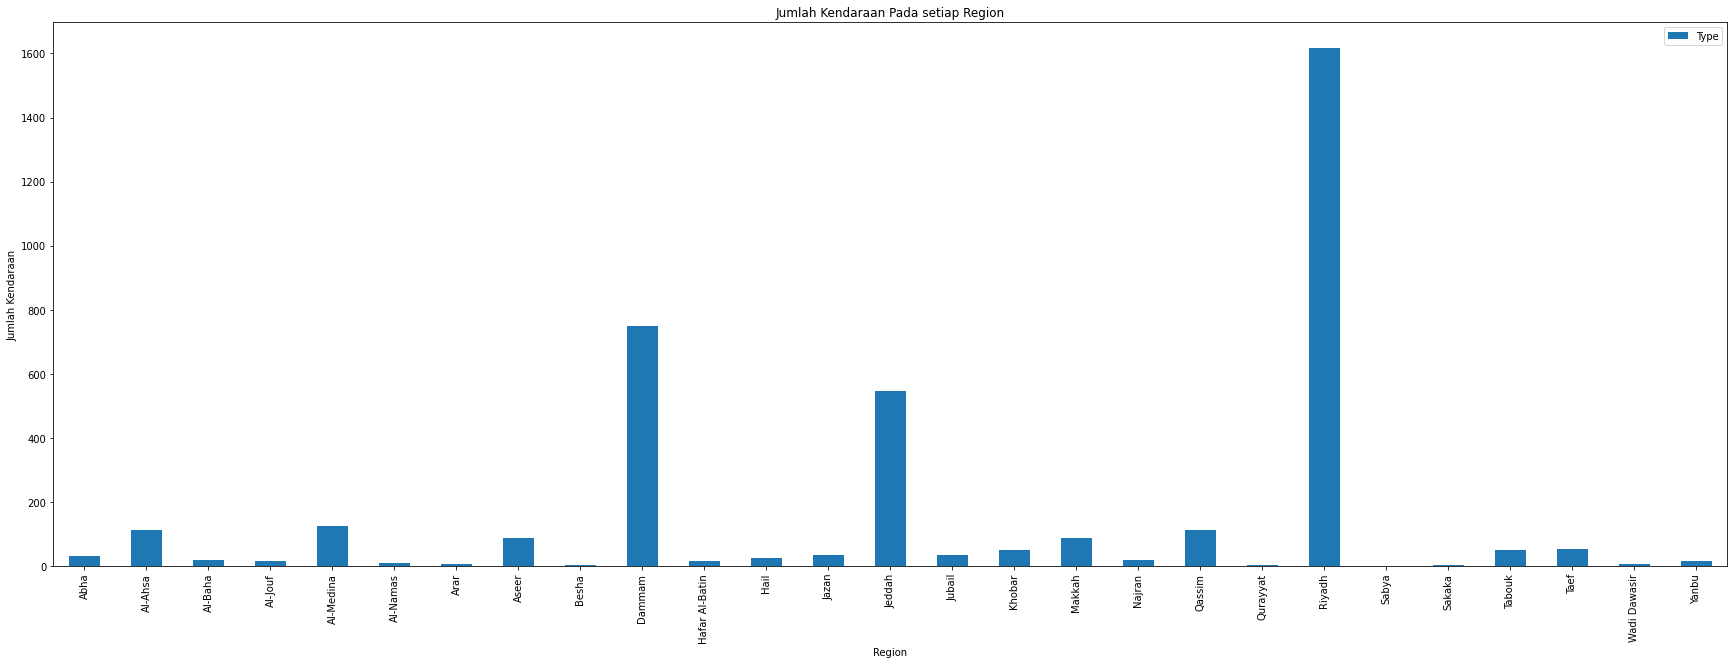

In [146]:
from IPython.display import display


neighbour_pivot = df2.pivot_table(index='Region', values='Type', aggfunc='count')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(30, 10))
pivot_plot.set_xlabel('Region')
pivot_plot.set_ylabel('Jumlah Kendaraan')
pivot_plot.set_title('Jumlah Kendaraan Pada setiap Region')
plt.show()

Riadh merupakan region dengan tingkat penjualan paling banyak dengan 1617 penjualan tanpa negotiable true

In [147]:
df3 = df2.groupby(['Year']).count()
df7 = df2.groupby(['Year']).sum()
df3['prosentase'] = (df3['Price']/df3['Price'].sum())*100
df3['prosentase2'] = (df7['Price']/df7['Price'].sum())*100
df3['Total_price'] = df7['Price']



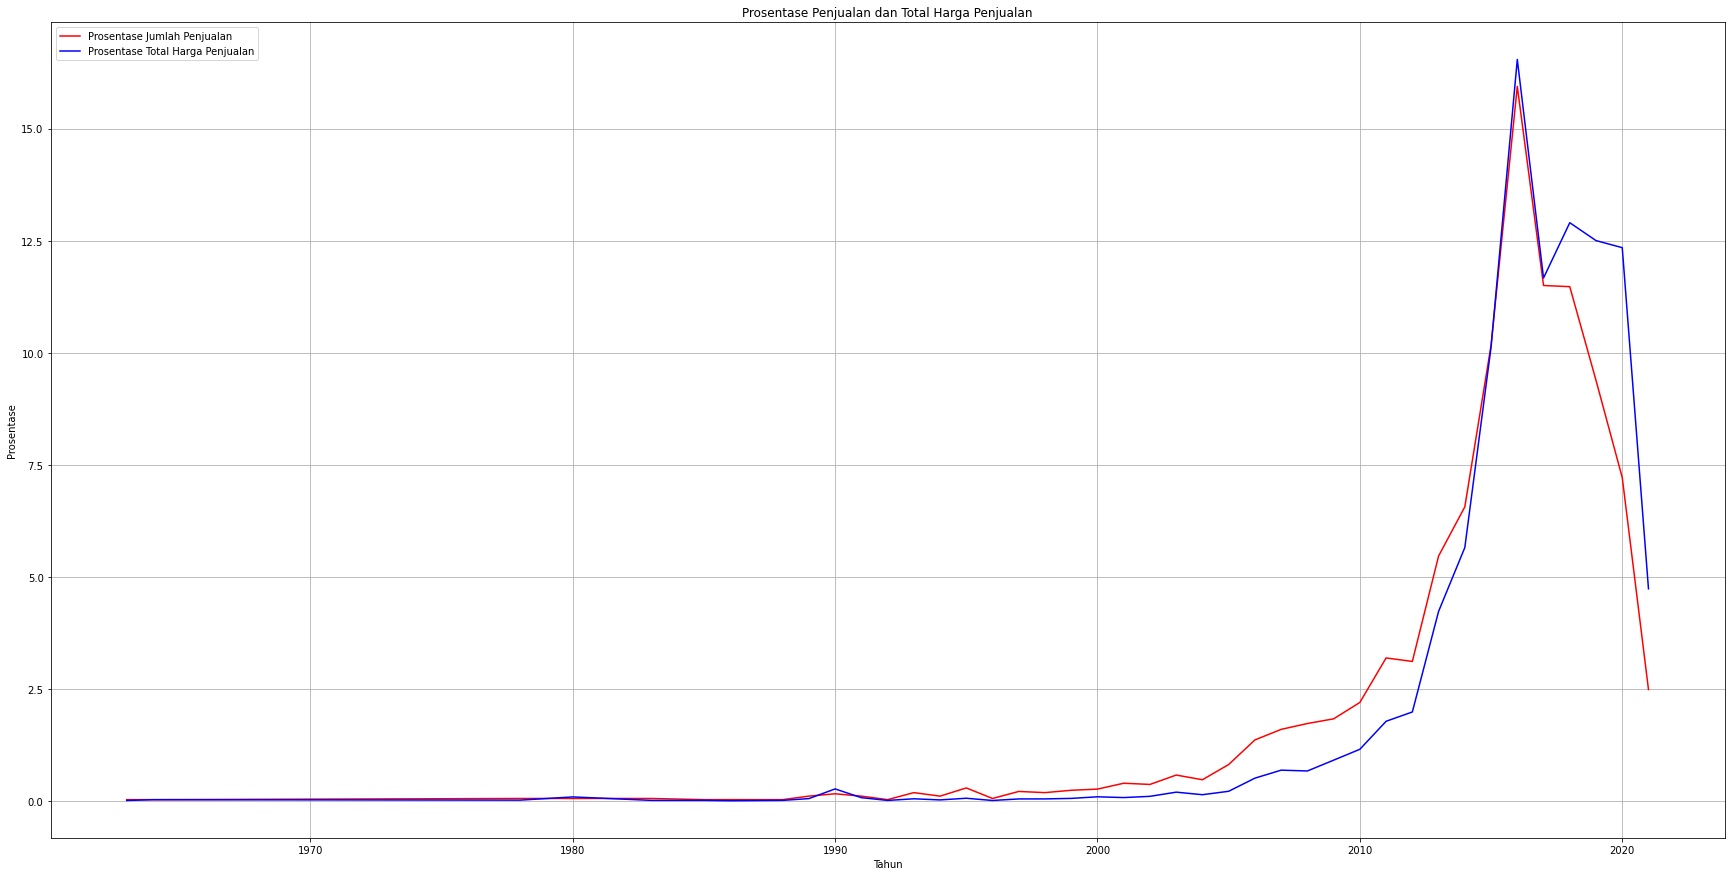

In [148]:
plt.figure(figsize=(30,15))
plt.plot( df3.index, df3['prosentase'], "red",
            df3.index, df3['prosentase2'], "Blue",)
plt.title ("Prosentase Penjualan dan Total Harga Penjualan")
plt.ylabel("Prosentase")
plt.xlabel ("Tahun")
plt.legend(["Prosentase Jumlah Penjualan",'Prosentase Total Harga Penjualan'])

plt.grid(True)
plt.show()

In [149]:
df3[['Price','Total_price' ]].sort_values('Price', ascending= False).head(10)

,Price,Total_price
Year,,
2016,610,49384126
2017,440,34826767
2018,439,38509783
2015,389,30221121
2019,359,37319141
2020,276,36847021
2014,251,16868900
2013,209,12616587
2011,122,5298500


Dapat dilihat bahwa tren penjualan mobil semakin meningkat sepanjang tahun, tetapi terjadi penurunan pada tahun 2016 dan Tahun perakitan tahun 2016 dan 2018 merupakan tahun perakitan paling tinggi total harga penjualannya.

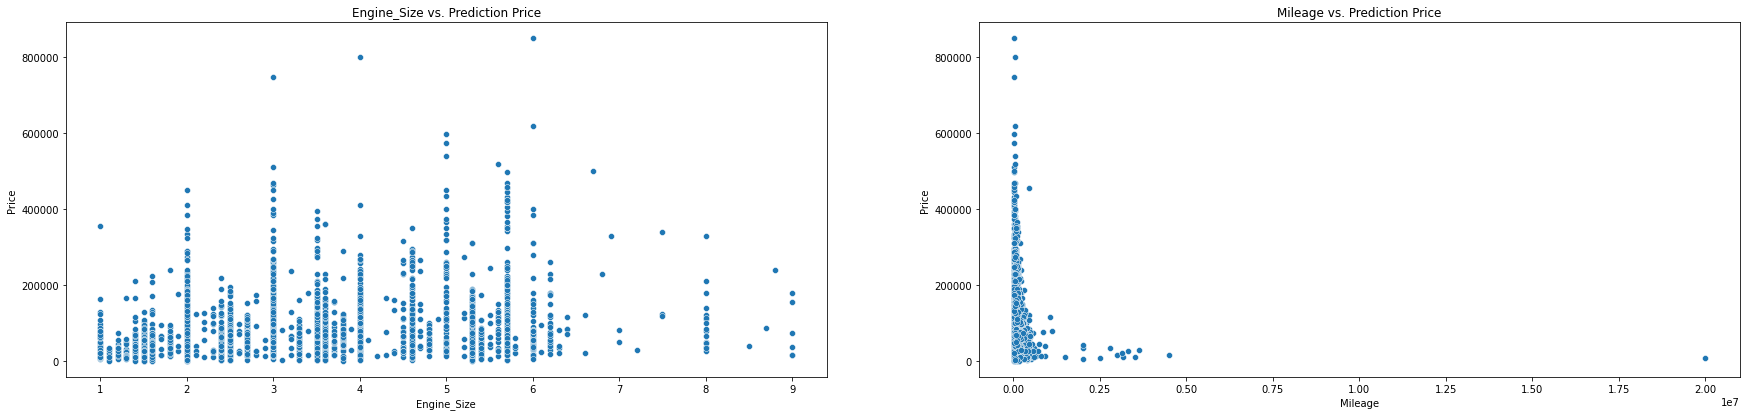

In [150]:
count = 0
fig = plt.figure(figsize=(30,30))
for i in df2[['Engine_Size','Mileage']].columns:
    count +=1
    ax= plt.subplot(4,2,count)
    title = pd.DataFrame(df2[i]).columns[0] + ' vs. Prediction Price'
    sns.scatterplot(x=df2[i], y=df2['Price']).set(title=title, 
                                                xlabel=pd.DataFrame(df2[i]).columns[0], 
                                                ylabel='Price')   

Engine size tidak terlihat polanya terhadap harga, sedangkan semakin besar millage cenderung memiliki harga yang lebih rendah

In [151]:
display(df2.describe(), df2.describe(include='object'))

,Year,Engine_Size,Mileage,Price
count,3826.000000,3826.000000,3.826000e+03,3826.000000
mean,2014.852065,3.179587,1.426446e+05,78015.813382
std,5.109885,1.458512,3.783049e+05,72725.279149
min,1963.000000,1.000000,1.000000e+02,500.000000
25%,2013.000000,2.000000,4.800000e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.830000e+05,94000.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


,Type,Region,Make,Gear_Type,Origin,Options
count,3826,3826,3826,3826,3826,3826
unique,320,27,56,2,4,3
top,Camry,Riyadh,Toyota,Automatic,Saudi,Full
freq,149,1616,889,3422,2895,1472


Text(0.5, 1.0, 'Correlation Matrix')

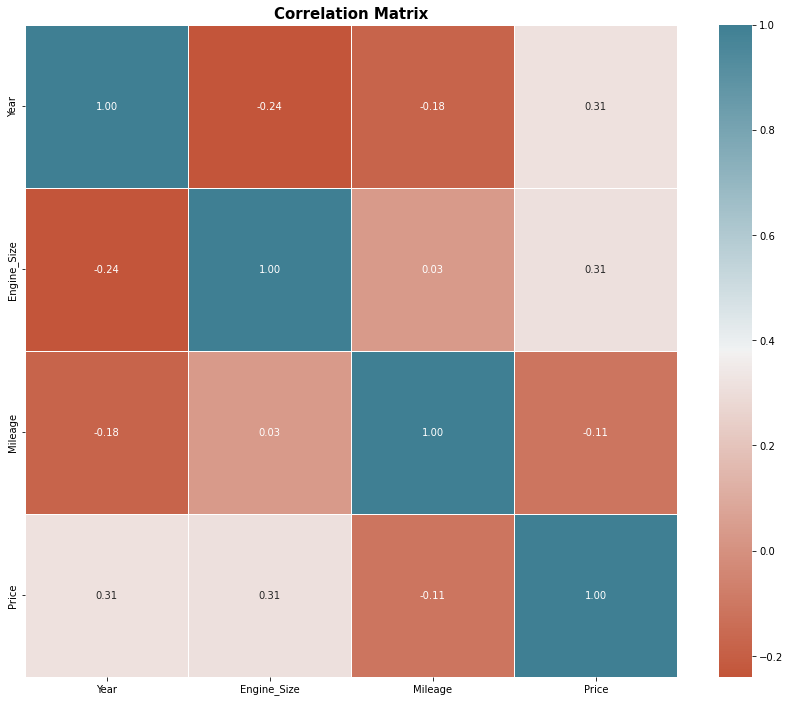

In [152]:
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df2.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

#### Encoding

In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split


In [154]:
df2.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Price'],
      dtype='object')

In [155]:
import category_encoders as ce
transformer = ColumnTransformer([
    ('ordinal', ce.OrdinalEncoder(), ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options'])
], remainder='passthrough')

In [156]:
x2 = df2.drop(columns=['Price'])
y2 = df2['Price']


In [157]:
# Data Splitting
x2_train, x2_test, y2_train, y2_test= train_test_split(
    x2,
    y2,  
    test_size=0.2,
    random_state=42)

In [158]:
pd.DataFrame(x2_train.head())

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
4606,Maxima,Riyadh,Nissan,Automatic,Saudi,Full,2017,1.0,860000
3366,Accent,Dammam,Hyundai,Automatic,Saudi,Standard,2017,1.4,102000
1223,Taurus,Qassim,Ford,Automatic,Saudi,Standard,2015,2.5,247000
1031,Sonata,Riyadh,Hyundai,Automatic,Saudi,Semi Full,2016,2.4,210000
4948,Civic,Jeddah,Honda,Automatic,Saudi,Semi Full,2018,1.6,91000


In [159]:
testing = pd.DataFrame(transformer.fit_transform(x2_train),columns=transformer.get_feature_names())
testing.head()

,ordinal__Type,ordinal__Region,ordinal__Make,ordinal__Gear_Type,ordinal__Origin,ordinal__Options,Year,Engine_Size,Mileage
0,1.0,1.0,1.0,1.0,1.0,1.0,2017.0,1.0,860000.0
1,2.0,2.0,2.0,1.0,1.0,2.0,2017.0,1.4,102000.0
2,3.0,3.0,3.0,1.0,1.0,2.0,2015.0,2.5,247000.0
3,4.0,1.0,2.0,1.0,1.0,3.0,2016.0,2.4,210000.0
4,5.0,4.0,4.0,1.0,1.0,3.0,2018.0,1.6,91000.0


## Modelling dan Evaluasi

Tahapan ini bertujuan untuk mendapatkan model dan parameter terbaik untuk gigunakan dalam mempredikisi nilai harga.

### Model Performance

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

# Definisi Algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

scaler = StandardScaler()
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

In [161]:
scoring = {'RMSE': 'neg_root_mean_squared_error', 
        "MAE" : 'neg_mean_absolute_error', 
        'MAPE' : 'neg_mean_absolute_percentage_error' }
skor = {}
for j in scoring:
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)
    skor[j] = {}
    e = {}
    for i in models:
        idx = str(i.regressor ).split("(")[0]
        estimator_opsi = Pipeline([
            ('preprocessing', transformer),
            ('scaler', scaler),
            ('model', i)
            ])
        model = cross_val_score(
            estimator_opsi, 
            x2_train, 
            y2_train, 
            cv=crossval, 
            scoring= scoring[j], 
            error_score='raise'
        )
        e[idx] = model
        skor[j].update (e)



In [162]:
for i in skor:
    data = pd.DataFrame(skor[i])
    print(i)
    display (data)
mat = {}
for i in skor:
    b = {}
    c = {'Mean' , 'Std' }
    for j in c:
        text = j + "_" + i
        mat[text] = {}
        for k in skor[i]:
            rata2 =  (skor[i][k].mean())
            std =  (skor[i][k].std())
            if j == 'Mean':
                a = rata2
            else:
                a = std
            b[k] = a
            mat[text].update(b)

matrix = pd.DataFrame(mat)
print ('Matrix Evaluasi')
display(matrix)

RMSE


,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor
0,-57934.454678,-49944.706934,-50021.618631,-40212.455966,-37818.219780
1,-59658.740990,-52651.757926,-59073.476043,-41402.259328,-49075.988130
2,-61295.573033,-55931.529544,-47891.921201,-41880.704909,-36250.866837
3,-49111.179326,-42335.441027,-50105.326031,-31040.345058,-32581.004087
4,-58663.891288,-47155.387239,-47034.190101,-34818.577508,-35789.970204


MAE


,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor
0,-32681.416759,-27478.901815,-24417.471424,-18872.355652,-19092.244898
1,-31974.837680,-27278.207022,-28708.669516,-19543.615465,-20656.277469
2,-31134.202169,-26853.804409,-24106.559171,-18605.715956,-18127.124370
3,-29915.639451,-23912.050236,-26800.571407,-17256.113991,-17582.419561
4,-32511.790756,-27340.379336,-23730.281266,-19003.387672,-18685.040389


MAPE


,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor
0,-1.167356,-1.249321,-1.040292,-0.958835,-0.984487
1,-0.782750,-0.656147,-0.906902,-0.602499,-0.502001
2,-0.721572,-0.684882,-0.777581,-0.538256,-0.528939
3,-1.086866,-1.155092,-1.251713,-1.001229,-0.937418
4,-1.052142,-0.934132,-0.836427,-0.755470,-0.678777


Matrix Evaluasi


,Std_RMSE,Mean_RMSE,Std_MAE,Mean_MAE,Std_MAPE,Mean_MAPE
LinearRegression,4262.450245,-57332.767863,1018.417500,-31643.577363,0.176536,-0.962137
KNeighborsRegressor,4653.390021,-49603.764534,1346.577165,-26572.668563,0.239813,-0.935915
DecisionTreeRegressor,4293.574262,-50825.306401,1908.853263,-25552.710557,0.169042,-0.962583
RandomForestRegressor,4242.760230,-37870.868554,763.879338,-18656.237747,0.184982,-0.771258
XGBRegressor,5649.072338,-38303.209808,1046.475673,-18828.621337,0.201371,-0.726324


Terdapat 2 model dengan nilai terbaik, dimana nilai RMSE dan MAE terbaik adalah model *Random Forest Regressor*, Sedangkan nilai MAPE terbaik adalah model *XGBoost*. Untuk mengetahui model terbaik selanjutnya akan dilakukan *Test Set Predictions* dengan menggunakan 2 modle terbaik.

Prediksi Test Set

In [174]:
nilai_mse= []
nilai_mae= []
nilai_mape= []

models2 = [log_xgb, log_rf]

for i in models2:
    estimator_opsi = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
           ])
    estimator_opsi.fit(x2_train,y2_train)
    prediksi = estimator_opsi.predict(x2_test)
    mse=mean_squared_error(y2_test,prediksi)
    mae=mean_absolute_error(y2_test,prediksi)
    mape=mean_absolute_percentage_error(y2_test,prediksi)
    nilai_mse.append(round(mse,2))
    nilai_mae.append(round(mae,2))
    nilai_mape.append(round(mape,2))

tabel_1 = pd.DataFrame({'model':[ 'XGBoost', 'Random Forest'],
            'RMSE':nilai_mse,'MAE':nilai_mae,'MAPE':nilai_mape}).set_index('model').sort_values(by='MAPE',ascending=True)

tabel_1

,RMSE,MAE,MAPE
model,,,
Random Forest,1.548257e+09,18956.25,1.35
XGBoost,1.551473e+09,19874.30,1.36


Dapat terlihat bahwa Random forrest merupakan model terbaik, dapat di lihat dari *test set prediction* diatas bahwa *random forest* memiliki nilai RMSE, MAE dan MAPE lebih kecil dari *decission tree*.

### Hyperparameter Tunning

**Random Forest** memiliki performance paling tinggi dibandingkan dengan model yang lainnya. Tahapan ini untuk mencari parameter terbaik untuk model (*Hyperparameter Tunning*), maka pemodelan akan menggunakan Random Forest. 

In [164]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

parameters = {'Forest__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
              'Forest__max_features': ['auto', 'sqrt','log2',None],
              'Forest__min_samples_split': [2, 5, 10],
              'Forest__min_samples_leaf': [1, 2, 4],
              'Forest__bootstrap': [True, False],
              'Forest__warm_start': [True, False]}

steps = [('preprocessing', transformer),
        ('scaler', StandardScaler()), 
        ('Forest', RandomForestRegressor(random_state=42))]
pipeline2 = Pipeline(steps)
crossval = KFold(n_splits=5, shuffle=True, random_state=42)

In [165]:
rf_random2 = RandomizedSearchCV(estimator = pipeline2, 
                                param_distributions = parameters, 
                                n_iter = 100, 
                                cv = crossval, 
                                verbose=2, 
                                scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
                                random_state=42, 
                                refit = 'neg_root_mean_squared_error',
                                n_jobs = -1)
rf_random2.fit(x2_train, y2_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make',
                                                                                'Gear_Type',
                                                                                'Origin',
                                                                                'Options'])])),
                                             ('scaler', StandardScaler()),
                                             ('Forest',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=100, n_j...
                                                                 'log2', None],
                                        'Forest__min_samples_leaf': [1, 2, 4],
                                        'Forest__min_samples_split': [2, 5, 10],
                                        'Forest__n_estimators': [200, 400, 600,
                                                                 800, 1000,
                                                                 1200, 1400,
                                                                 1600, 1800,
                                                                 2000],
                                        'Forest__warm_start': [True, False]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'],
                   verbose=2)

In [166]:
pd.DataFrame({'Best Value' : rf_random2.best_params_.values(), 'Parameter' : rf_random2.best_params_.keys()}).set_index('Parameter')

,Best Value
Parameter,
Forest__warm_start,False
Forest__n_estimators,1400
Forest__min_samples_split,5
Forest__min_samples_leaf,1
Forest__max_features,log2
Forest__bootstrap,False


#### Evaluasi Parameter

In [167]:

pipeline2.fit(x2_train, y2_train)
prediksi_base = pipeline2.predict(x2_test)
mape_base_model=mean_absolute_percentage_error(y2_test,prediksi_base)
rmse_base = np.sqrt(mean_squared_error(y2_test, prediksi_base))
mae_base = mean_absolute_error(y2_test, prediksi_base)


akurasi_base_model = 100 - mape
akurasi_base = round(akurasi_base_model,2)
score_before_tuning = [ rmse_base, mae_base, mape_base_model]

In [168]:
best_parameter = rf_random2.best_estimator_
prediksi_best = best_parameter.predict(x2_test)
mape_best_parameter=mean_absolute_percentage_error(y2_test,prediksi_best)
rmse_best_param = np.sqrt(mean_squared_error(y2_test, prediksi_best))
mae_best_param = mean_absolute_error(y2_test, prediksi_best)


akurasi_best_parameter = 100 - mape_best_parameter
akurasi_best_parameter = round(akurasi_best_parameter,2)
score_after_tuning = [rmse_best_param, mae_best_param, mape_best_parameter]

In [169]:
model = ['RMSE', 'MAE', 'MAPE']
matix = pd.DataFrame({'Evaluasi':model,
            'Base Model':score_before_tuning,'Best Parameter':score_after_tuning}).set_index('Evaluasi')
matix['Selisih'] = matix['Best Parameter'] - matix['Base Model']
matix

,Base Model,Best Parameter,Selisih
Evaluasi,,,
RMSE,38401.779011,36960.890029,-1440.888981
MAE,19537.291902,18683.829536,-853.462366
MAPE,1.855452,1.833635,-0.021817


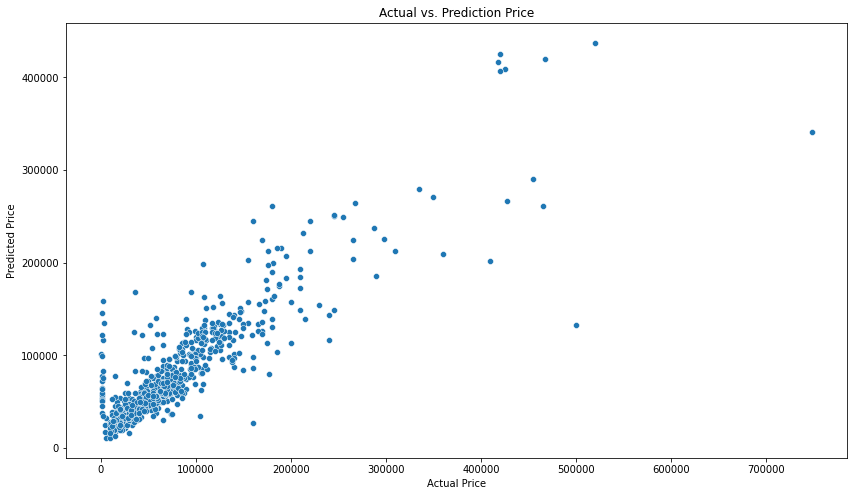

In [170]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y2_test, y=prediksi_best).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

Model sedikit mengalami peningkatan performance (nilai RMSE, MAPE dan MAE berkurang). Sehingga dapat dapat di ambil kesimpulan bahwa hyperparameter tunning yang dilakukan berpengaruh pada model dan akan digunakan dalam pemodelan. Dilihat pada chart diatas bahwa gradient antara harga real dan harga prediksi mendekati 1, jadi dikatakan bahwa model dapat memprediksi data dengan baik.

### Feature Importance

<AxesSubplot:title={'center':'Feature Importances'}>

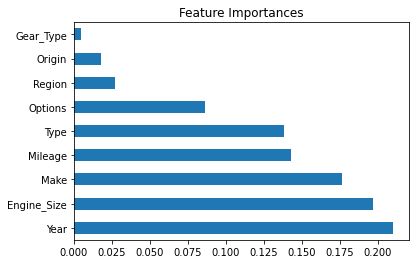

In [171]:
feature_importances = best_parameter._final_estimator.feature_importances_
feature_imp = pd.Series(feature_importances, x2.columns).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances')

Dari grafik diatas dapat dilihat bahwa Year menempati bobot tertinggi dengan 20.69%, sedangkan geartype hanya sedikit mempengaruhi terhadap predikis harga

## Conclution & Evaluation

### Conclusion

Berdasarkan pemodelan yang dilakukan fitur *year* menjadi fitur yang paling berpengaruh dalam menentukan harga. 

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE dan MAPE. Dilihat dari nilai akurasinya model memiliki nilai MAPE 1.833635 dengan rentang harga yang bisa di akomodir oleh model sampai dengan 850000.

Model yang dihasilkan cukup baik dapat dilihat dari harga aktual dan prediksi dengan distribusi data dengan gradien mendekati 1,artinya bahwa tidak banyak nilai prediksi yang berjauhan dari nilai aslinya.

Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah penjualan. Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.

Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya.

### Recomendation

1. Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap lakunya listing jika dibandingkan dengan host yang menentukan harga sewa listingnya sendiri.<br><br>
2. Penambahan fitur - fitur lain yang lebih korelatif dengan harga, seperti fitur kendaraan, kondisi kendaraan ataupun fitur fitur lainnya untuk meningkatkan tinkat akurasi data jika memungkinkan. Selain itu bisa juga dilakukan updating terhadap data yang baru untuk meningkatkan kapasitas prediksi dari model.<br><br>
3. Dilakukan pengecekan terhadp prediksi yang memiliki nilai error yang tinggi, dimana predikisi -  prediksi tersebut dapat dikelompokan menjadi *overestimation* dan *underestimation* dan dipilih 5% error (tergantung kepada selang kepercayaan yang di harapkan) paling ekstrim dari setiap grup. Selanjutnya dapat dilakukan pengelompokan menjadi 3 dengan menambahkan grup mayoritas yang nilai error mendekati nilai mean (90%). Tahapan berikiunnya yang dilakukan adalah penggabungan antara eror tersebut dengan indipenden variabel sehingga dapat diketahui variabel apa yang memiliki nilai error yang tinggi jadi kita dapat melakukan training model dengan feature enginerin yang lebih optimal.<br><br>
4. Dari feature importance terlihat bahwa gear_type, origin dan region memiliki nilai kontribusi yang kecil terhadap model, bisa dilakukan feature enginering untuk menghilangkan salah satu atau ketiga kolom tersebut untuk dilihat pengarunya terhadap model yang dignakan feature tersebut dihilangkan.

## Penyimpanan Model

In [172]:
# Save Model

import pickle

best_parameter.fit(x2_train, y2_train)
pickle.dump(best_parameter, open('Saudi_Arabian_Used_Car_RandomForrest.sav', 'wb'))

In [173]:
# Load model
filename = 'Saudi_Arabian_Used_Car_RandomForrest.sav'
loaded_model = pickle.load(open(filename, 'rb'))